<a href="https://colab.research.google.com/github/sharvanikagithoju/vault-of-code/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import plotly.colors as colors
pio.templates.default="plotly_white"
df=pd.read_excel("/content/Sample - Superstore.xlsx")

In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
df.tail(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9993,9994,CA-2017-119914,2017-05-04,2017-05-09,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.16,2,0.0,72.948


In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

<Axes: >

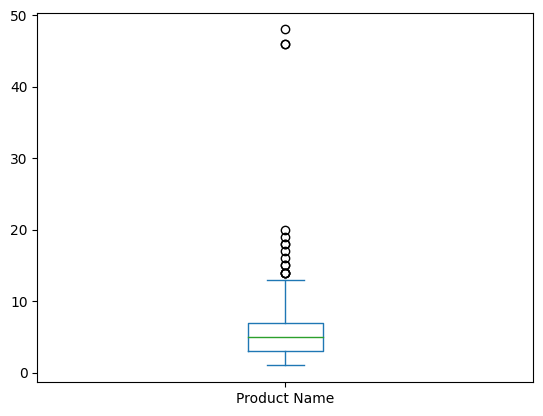

In [6]:
df["Product Name"].value_counts().plot(kind="box")

In [9]:
#To find the monthly sales
monthly_sales=df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
print(monthly_sales)


   Order Date        Sales
0     2014-01   14236.8950
1     2014-02    4519.8920
2     2014-03   55691.0090
3     2014-04   28295.3450
4     2014-05   23648.2870
5     2014-06   34595.1276
6     2014-07   33946.3930
7     2014-08   27909.4685
8     2014-09   81777.3508
9     2014-10   31453.3930
10    2014-11   78628.7167
11    2014-12   69545.6205
12    2015-01   18174.0756
13    2015-02   11951.4110
14    2015-03   38726.2520
15    2015-04   34195.2085
16    2015-05   30131.6865
17    2015-06   24797.2920
18    2015-07   28765.3250
19    2015-08   36898.3322
20    2015-09   64595.9180
21    2015-10   31404.9235
22    2015-11   75972.5635
23    2015-12   74919.5212
24    2016-01   18542.4910
25    2016-02   22978.8150
26    2016-03   51715.8750
27    2016-04   38750.0390
28    2016-05   56987.7280
29    2016-06   40344.5340
30    2016-07   39261.9630
31    2016-08   31115.3743
32    2016-09   73410.0249
33    2016-10   59687.7450
34    2016-11   79411.9658
35    2016-12   96999.0430
3

Axes(0.125,0.11;0.775x0.77)


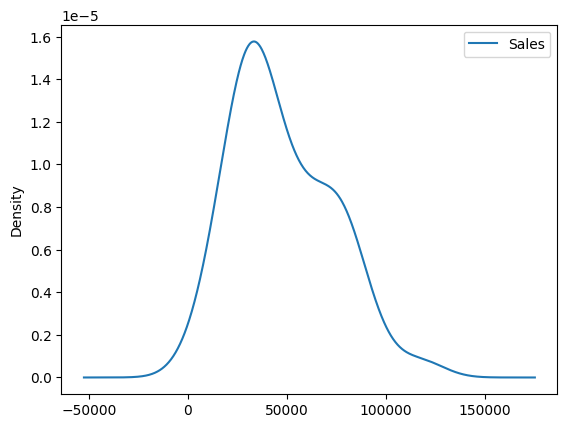

In [10]:
#To find the monthly sales using plotly
monthly_sales=df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index().plot(kind="density")
print(monthly_sales)


Axes(0.125,0.11;0.775x0.77)


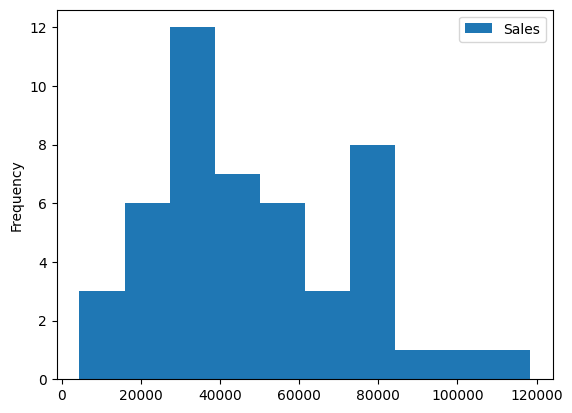

In [11]:
#To find the monthly sales using plotly
monthly_sales=df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index().plot(kind="hist")
-print(monthly_sales)


In [14]:
#sales by category
sales_by_category=df.groupby("Category")["Sales"].sum().reset_index()
print(sales_by_category)

          Category        Sales
0        Furniture  741999.7953
1  Office Supplies  719047.0320
2       Technology  836154.0330


Axes(0.125,0.11;0.775x0.77)


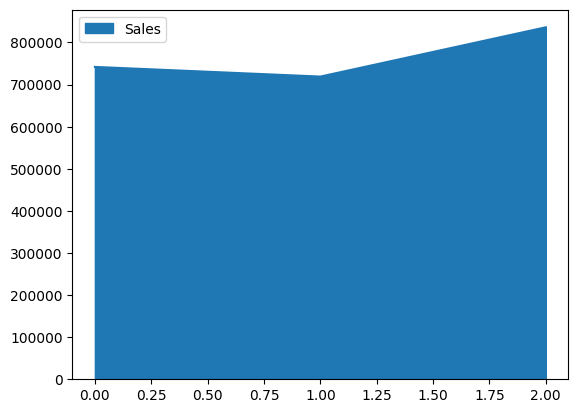

In [15]:
#sales by category
sales_by_category=df.groupby("Category")["Sales"].sum().reset_index().plot(kind="area")
print(sales_by_category)

In [19]:
#monthly profit
monthly_profits=df.groupby(df['Order Date'].dt.to_period('M'))['Profit'].sum().reset_index()
print(monthly_profits)

   Order Date      Profit
0     2014-01   2450.1907
1     2014-02    862.3084
2     2014-03    498.7299
3     2014-04   3488.8352
4     2014-05   2738.7096
5     2014-06   4976.5244
6     2014-07   -841.4826
7     2014-08   5318.1050
8     2014-09   8328.0994
9     2014-10   3448.2573
10    2014-11   9292.1269
11    2014-12   8983.5699
12    2015-01  -3281.0070
13    2015-02   2813.8508
14    2015-03   9732.0978
15    2015-04   4187.4962
16    2015-05   4667.8690
17    2015-06   3335.5572
18    2015-07   3288.6483
19    2015-08   5355.8084
20    2015-09   8209.1627
21    2015-10   2817.3660
22    2015-11  12474.7884
23    2015-12   8016.9659
24    2016-01   2824.8233
25    2016-02   5004.5795
26    2016-03   3611.9680
27    2016-04   2977.8149
28    2016-05   8662.1464
29    2016-06   4750.3781
30    2016-07   4432.8779
31    2016-08   2062.0693
32    2016-09   9328.6576
33    2016-10  16243.1425
34    2016-11   4011.4075
35    2016-12  17885.3093
36    2017-01   7140.4391
37    2017-0

Axes(0.125,0.11;0.775x0.77)


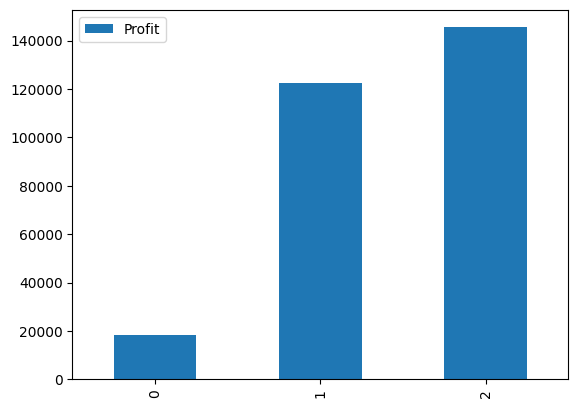

In [24]:
#profit analysis by category
profit_analysis=df.groupby('Category')['Profit'].sum().reset_index().plot(kind="bar")
print(profit_analysis)


<Axes: ylabel='Category'>

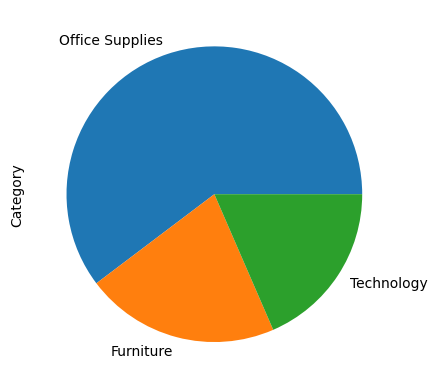

In [25]:
df['Category'].value_counts().plot(kind="pie")

In [26]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

<Axes: ylabel='Sub-Category'>

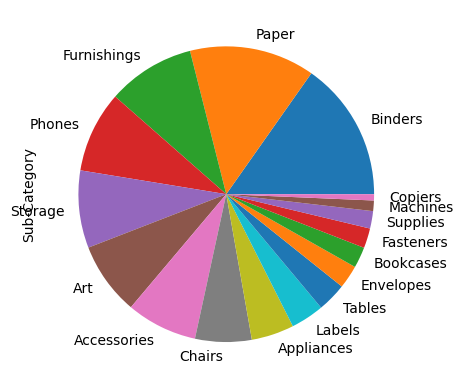

In [31]:
df["Sub-Category"].value_counts().plot(kind="pie")